In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid") 
from sklearn.metrics  import roc_curve, roc_auc_score
import joblib

In [2]:
df = pd.read_csv("PCOS_data.csv", index_col = "Sl. No")
df.head()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,1,0,28,44.6,152.0,19.3,15,78,22,10.48,...,0,1,0,110,80,3,3,18.0,18.0,8.5
2,2,0,36,65.0,161.5,24.9,15,74,20,11.70,...,0,0,0,120,70,3,5,15.0,14.0,3.7
3,3,1,33,68.8,165.0,25.3,11,72,18,11.80,...,1,1,0,120,80,13,15,18.0,20.0,10.0
4,4,0,37,65.0,148.0,29.7,13,72,20,12.00,...,0,0,0,120,70,2,2,15.0,14.0,7.5
5,5,0,25,52.0,161.0,20.1,11,72,18,10.00,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    int64  
 1   PCOS (Y/N)              541 non-null    int64  
 2    Age (yrs)              541 non-null    int64  
 3   Weight (Kg)             541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   BMI                     541 non-null    float64
 6   Blood Group             541 non-null    int64  
 7   Pulse rate(bpm)         541 non-null    int64  
 8   RR (breaths/min)        541 non-null    int64  
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle(R/I)              541 non-null    int64  
 11  Cycle length(days)      541 non-null    int64  
 12  Marraige Status (Yrs)   541 non-null    float64
 13  Pregnant(Y/N)           541 non-null    int64  
 14  No. of abortions        541 non-null    int64  

In [4]:
df.shape

(541, 43)

In [5]:
df.isnull().sum()



Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)   

In [6]:
# correcting the data Types
def correct_dtype():
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = pd.to_numeric(df[column], errors="coerce")
            df.round(2)
    return df
correct_dtype() 
df.head()       

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,,,,,,,,,,,,,,,,,,,,,
1,1,0,28,44.6,152.0,19.3,15,78,22,10.48,...,0,1,0,110,80,3,3,18.0,18.0,8.5
2,2,0,36,65.0,161.5,24.9,15,74,20,11.70,...,0,0,0,120,70,3,5,15.0,14.0,3.7
3,3,1,33,68.8,165.0,25.3,11,72,18,11.80,...,1,1,0,120,80,13,15,18.0,20.0,10.0
4,4,0,37,65.0,148.0,29.7,13,72,20,12.00,...,0,0,0,120,70,2,2,15.0,14.0,7.5
5,5,0,25,52.0,161.0,20.1,11,72,18,10.00,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    int64  
 1   PCOS (Y/N)              541 non-null    int64  
 2    Age (yrs)              541 non-null    int64  
 3   Weight (Kg)             541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   BMI                     541 non-null    float64
 6   Blood Group             541 non-null    int64  
 7   Pulse rate(bpm)         541 non-null    int64  
 8   RR (breaths/min)        541 non-null    int64  
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle(R/I)              541 non-null    int64  
 11  Cycle length(days)      541 non-null    int64  
 12  Marraige Status (Yrs)   541 non-null    float64
 13  Pregnant(Y/N)           541 non-null    int64  
 14  No. of abortions        541 non-null    int64  

In [8]:
# Handling missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna(df[column].mode()[0])

df.isnull().sum()


Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)   

<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

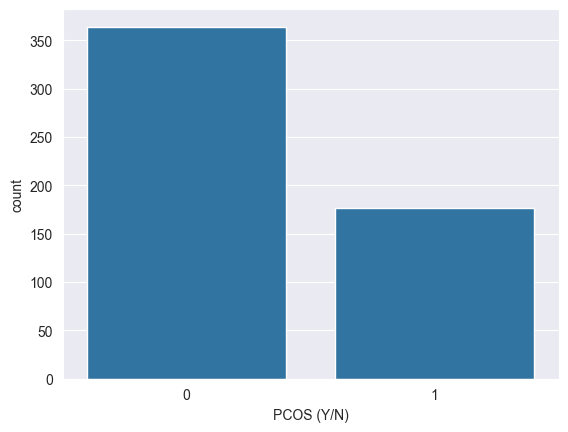

In [9]:
sns.countplot(x = "PCOS (Y/N)", data= df)

Text(0.5, 1.0, 'Features Correlating with having PCOS')

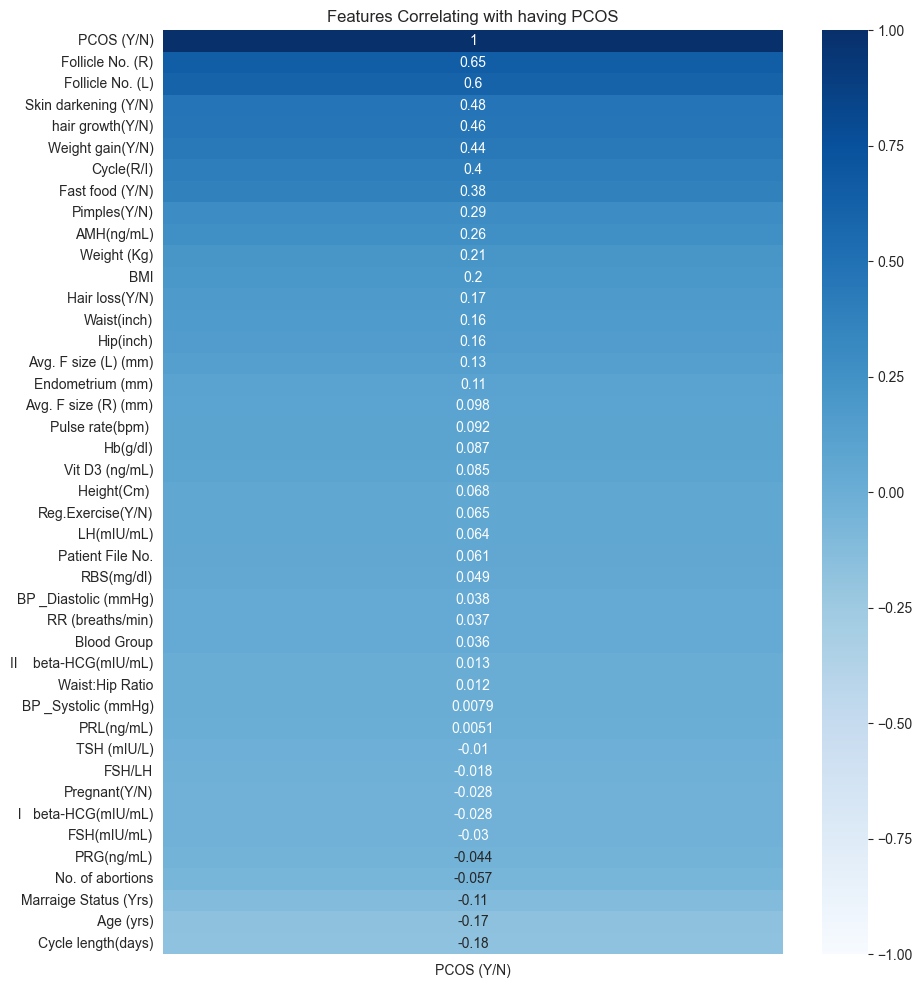

In [10]:
plt.figure(figsize = (10, 12))
heatmap = sns.heatmap(df.corr()[["PCOS (Y/N)"]].sort_values(by = "PCOS (Y/N)", ascending =False), vmin = -1, vmax = 1, cmap = "Blues", annot = True)
heatmap.set_title("Features Correlating with having PCOS")

In [11]:
X = df.drop(columns=["PCOS (Y/N)", "Patient File No."], axis = 1)
y = df["PCOS (Y/N)"] 

In [12]:
required_cols = X.columns.to_list()

In [13]:
# Splitingthe data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state=0 )

In [14]:
categorical_cols = ['Blood Group']
binary_cols = ['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
               'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
               'Fast food (Y/N)', 'Reg.Exercise(Y/N)']


numeric_cols = [col for col in required_cols if col not in categorical_cols + binary_cols]

In [15]:
required_cols

[' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of abortions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [16]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),  # Only scale real numeric features
    ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ("bin", "passthrough", binary_cols),  # Don't scale binary columns
])


In [17]:
resample_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('resampler', SMOTETomek(random_state=0)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=0))
])

In [18]:
clf_model = resample_pipeline.fit(X_train, y_train) ;

In [19]:
predictions = clf_model.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [20]:
#Evaluating the model
list_p = ["Without PCOS", "With PCOS"]
print(classification_report(y_test,predictions, target_names=list_p))

              precision    recall  f1-score   support

Without PCOS       0.91      0.96      0.93        73
   With PCOS       0.91      0.81      0.85        36

    accuracy                           0.91       109
   macro avg       0.91      0.88      0.89       109
weighted avg       0.91      0.91      0.91       109



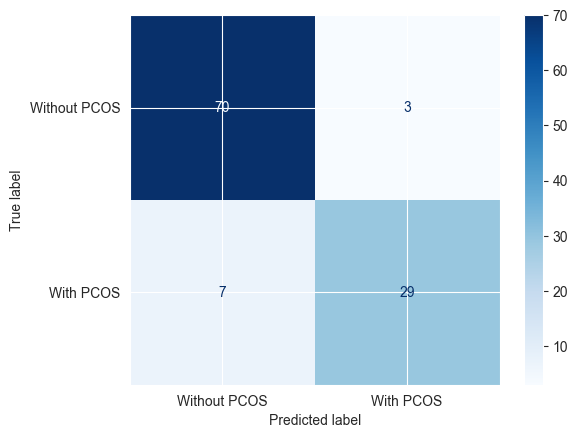

In [21]:
# Visualizing the confusion matrix
matrix = confusion_matrix(y_test,predictions)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = list_p)
display.plot(cmap=plt.cm.Blues)
plt.show()

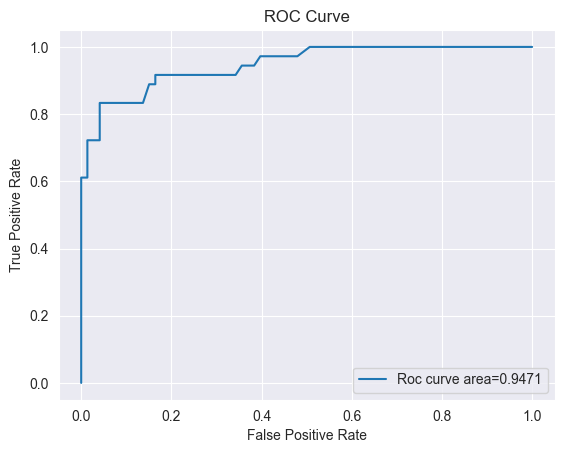

In [22]:

y_pred_proba = clf_model.predict_proba(X_test)[:,1]  # Extracts the probalities for the possitive class.  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculates fpr and tpr for different probability thresholds.

auc = roc_auc_score(y_test, y_pred_proba)  # Calculates the area under the ROC curve for the predicted probabilities and true labels.
plt.plot(fpr, tpr, label=f"Roc curve area={auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

In [23]:
# tunig the model
 
model_params = {
    "clf__max_depth": [1, 2, 4],
    "clf__n_estimators": [1, 5, 10]
}

grid_search = GridSearchCV(
    resample_pipeline,
    model_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         [' '
                                                                          'Age '
                                                                          '(yrs)',
                                                                          'Weight '
                                                                          '(Kg)',
                                                                          'Height(Cm) ',
                                                                          'BMI',
                                                                          'Pulse '
                                                                          'rate(bpm) ',
                                                                          'RR '
                                                                          '(breaths/min)',
                                                                          'Hb(g/dl)',
                                                                          'Cycle(R/I)',
                                                                          'Cycle '
                                                                          'length(days)',
                                                                          'Marraige '
                                                                          'Status '
                                                                          '(Yrs)',
                                                                          'No. '
                                                                          'of '
                                                                          'abortions',
                                                                          '  '
                                                                          'I   '
                                                                          'beta-HCG(mIU/mL)',
                                                                          'II    '
                                                                          'beta-HCG(mIU/mL)',
                                                                          'FSH(...
                                                                         ['Pregnant(Y/N)',
                                                                          'Weight '
                                                                          'gain(Y/N)',
                                                                          'hair '
                                                                          'growth(Y/N)',
                                                                          'Skin '
                                                                          'darkening '
                                                                          '(Y/N)',
                                                                          'Hair '
                                                                          'loss(Y/N)',
                                                                          'Pimples(Y/N)',
                                                                          'Fast '
                                                                          'food '
                                                                          '(Y/N)',
                                                                          'Reg.Exercise(Y/N)'])])),
                                       ('resampler',
                                        SMOTETomek(random_state=0)),
                                       ('clf',
            

In [24]:
best_model = grid_search.best_estimator_
y_predictions = best_model.predict(X_test)
y_predictions


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [25]:
#Evaluating the tuned model
list_p = ["Without PCOS", "With PCOS"]
print(classification_report(y_test,y_predictions, target_names=list_p))

              precision    recall  f1-score   support

Without PCOS       0.91      0.92      0.91        73
   With PCOS       0.83      0.81      0.82        36

    accuracy                           0.88       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.88      0.88      0.88       109



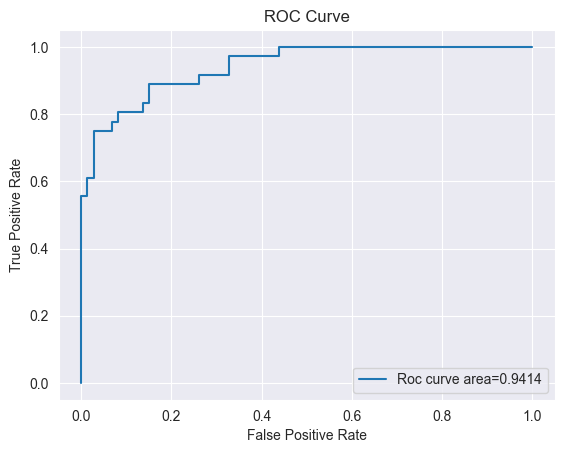

In [26]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]  # Extracts the probalities for the possitive class.  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Calculates fpr and tpr for different probability thresholds.

auc = roc_auc_score(y_test, y_pred_proba)  # Calculates the area under the ROC curve for the predicted probabilities and true labels.
plt.plot(fpr, tpr, label=f"Roc curve area={auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

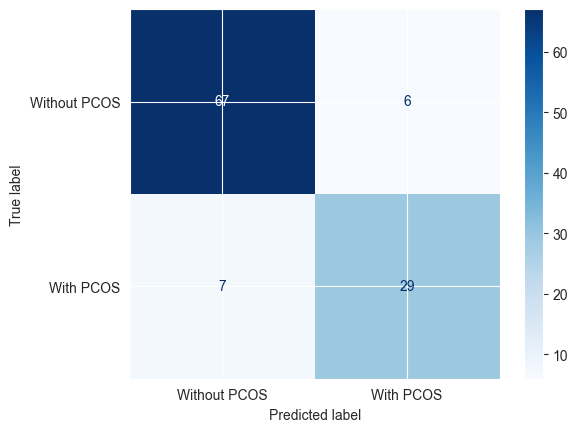

In [27]:
# Visualizing the confusion matrix of the tuned model
matrix = confusion_matrix(y_test,y_predictions)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = list_p)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
# Turns that the actual model performes better than the tuned model  

In [29]:
# saving the mode to joblib
joblib.dump({
    "model": resample_pipeline,
    "required_cols": required_cols
}, "pcos_model_revised.joblib")

['pcos_model_revised.joblib']

In [31]:
print(required_cols)

[' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
